In [6]:
#! pip install sqlite3
import sqlite3


In [7]:
con_sqlt = sqlite3.connect(r"Users/aurelio.sosa.netmind/Pandas/database.db")
dfdb = pd.read_sql_query("SELECT*FROM movies", con_sqlt)
con_sqlt.close()

dfdb


OperationalError: unable to open database file

In [7]:
import sqlite3
import pandas as pd
import os

# Obtener la ruta absoluta de la base de datos
db_path = os.path.abspath(r"Users/aurelio.sosa.netmind/Pandas/database.db")
print(db_path)

# Intentar la conexión
try:
    con_sqlt = sqlite3.connect(db_path)
    dfdb = pd.read_sql_query("SELECT * FROM movies", con_sqlt)
    con_sqlt.close()
    print(dfdb.head())  # Muestra las primeras filas si la conexión es exitosa
except sqlite3.OperationalError as e:
    print("Error al conectar a la base de datos:", e)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/Users/aurelio.sosa.netmind/Pandas/database.db
Error al conectar a la base de datos: unable to open database file


In [8]:
import sqlite3
import os
import pandas as pd

# Ruta absoluta del archivo de base de datos
db_path = os.path.abspath(r"Users/aurelio.sosa.netmind/Pandas/database.db")

# Intentar la conexión a la base de datos
try:
    con_sqlt = sqlite3.connect(db_path)
    print("Conexión exitosa")
    con_sqlt.close()
except sqlite3.OperationalError as e:
    print("Error al conectar a la base de datos:", e)

if not os.path.exists(db_path):
    print("El archivo de base de datos no existe en la ruta especificada.")
else:
    print("El archivo de base de datos existe.")



Error al conectar a la base de datos: unable to open database file
El archivo de base de datos no existe en la ruta especificada.


In [ ]:
con_sqlt = sqlite3.connect("database.db")  # Archivo en la misma carpeta
cursor = con_sqlt.cursor()

# Crear una tabla de prueba
cursor.execute("CREATE TABLE IF NOT EXISTS test (id INTEGER, name TEXT)")
con_sqlt.commit()

print("Base de datos creada exitosamente")
con_sqlt.close()


OperationalError: database is locked

In [11]:
import os

# Mostrar la ruta actual del script
print("Directorio actual:", os.getcwd())

# Listar archivos y carpetas en la ubicación actual
print("Archivos en la carpeta actual:", os.listdir())

# Verificar si la base de datos está en la carpeta
db_path = "Users/aurelio.sosa.netmind/Pandas/database.db"
if os.path.exists(db_path):
    print("El archivo de base de datos existe.")
else:
    print("El archivo de base de datos NO existe.")


Directorio actual: /mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas
Archivos en la carpeta actual: ['.amlignore', '.amlignore.amltmp', 'action_movies.csv', 'colesterol.csv', 'data.zip', 'database.db', 'dataset_salaris.csv', 'flights14.csv', 'FoodMarket.xlsx', 'frutas.csv', 'frutas.json', 'housing.csv', 'import_customers.csv', 'iris.csv', 'movies', 'pandas.ipynb', 'SalariesExtended.xlsx', 'WorldData.xlsx']
El archivo de base de datos NO existe.


In [12]:
import sqlite3
import pandas as pd

# Ruta absoluta detectada
db_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/database.db"

# Intentar la conexión con la ruta absoluta
try:
    with sqlite3.connect(db_path) as con_sqlt:
        dfdb = pd.read_sql_query("SELECT * FROM movies", con_sqlt)
    print(dfdb.head()) # Mostrar las primeras filas de la tabla
except Exception as e:
    print("Error al conectar a la base de datos:", e)


                                title  movieId  \
0                    Toy Story (1995)        1   
1                      Jumanji (1995)        2   
2             Grumpier Old Men (1995)        3   
3            Waiting to Exhale (1995)        4   
4  Father of the Bride Part II (1995)        5   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [ ]:
df_comedy = dfdb.loc[dfdb['genres'].str.contains('Comedy', case=False)]
print(df_comedy)

df_old_movies = dfdb.loc[dfdb['title'].str.contains('Old', case=False)]
print(df_old_movies)

df_filtered = dfdb.loc[dfdb['movieId'] > 10, ['title', 'genres']]
print(df_filtered)

first_movie = dfdb.iloc[0]
print(first_movie)

top_10_movies = dfdb.iloc[:10]
print(top_10_movies)

odd_rows = dfdb.iloc[1::2]
print(odd_rows)

df_selected_ids = dfdb[dfdb['movieId'].isin([1, 3, 5])]
print(df_selected_ids)

df_comedy_drama = dfdb[dfdb['genres'].isin(['Comedy', 'Drama'])]
print(df_comedy_drama)






                                          title  movieId  \
0                              Toy Story (1995)        1   
2                       Grumpier Old Men (1995)        3   
3                      Waiting to Exhale (1995)        4   
4            Father of the Bride Part II (1995)        5   
6                                Sabrina (1995)        7   
...                                         ...      ...   
9732                  Gintama: The Movie (2010)   193565   
9734                        Silver Spoon (2014)   193571   
9737  Black Butler: Book of the Atlantic (2017)   193581   
9738               No Game No Life: Zero (2017)   193583   
9741        Andrew Dice Clay: Dice Rules (1991)   193609   

                                           genres    year  \
0     Adventure|Animation|Children|Comedy|Fantasy  1995.0   
2                                  Comedy|Romance  1995.0   
3                            Comedy|Drama|Romance  1995.0   
4                                  

In [ ]:
drama_count = dfdb[dfdb['genres'].str.contains('Drama')].shape[0]
print(f"Total de películas de drama: {drama_count}")

dfdb['year'] = dfdb['title'].str.extract(r'\((\d{4})\)').astype(float)
print(dfdb.head())

df_before_2000 = dfdb[dfdb['year'] < 2000]
print(df_before_2000)

df_sorted = dfdb.sort_values(by='movieId', ascending=False)
print(df_sorted)

dfdb['genre_list'] = dfdb['genres'].str.split('|')
df_multiple_genres = dfdb[dfdb['genre_list'].apply(len) > 1]
print(df_multiple_genres)


Total de películas de drama: 4361
                                title  movieId  \
0                    Toy Story (1995)        1   
1                      Jumanji (1995)        2   
2             Grumpier Old Men (1995)        3   
3            Waiting to Exhale (1995)        4   
4  Father of the Bride Part II (1995)        5   

                                        genres    year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0  
1                   Adventure|Children|Fantasy  1995.0  
2                               Comedy|Romance  1995.0  
3                         Comedy|Drama|Romance  1995.0  
4                                       Comedy  1995.0  
                                    title  movieId  \
0                        Toy Story (1995)        1   
1                          Jumanji (1995)        2   
2                 Grumpier Old Men (1995)        3   
3                Waiting to Exhale (1995)        4   
4      Father of the Bride Part II (1995)        5   

In [15]:
from collections import Counter
all_genres = dfdb['genres'].str.split('|').sum()
genre_counts = Counter(all_genres)
print(genre_counts)

df_unique_movies = dfdb.drop_duplicates(subset=['title'])
print(df_unique_movies)


Counter({'Drama': 4361, 'Comedy': 3756, 'Thriller': 1894, 'Action': 1828, 'Romance': 1596, 'Adventure': 1263, 'Crime': 1199, 'Sci-Fi': 980, 'Horror': 978, 'Fantasy': 779, 'Children': 664, 'Animation': 611, 'Mystery': 573, 'Documentary': 440, 'War': 382, 'Musical': 334, 'Western': 167, 'IMAX': 158, 'Film-Noir': 87, '(no genres listed)': 34})
                                          title  movieId  \
0                              Toy Story (1995)        1   
1                                Jumanji (1995)        2   
2                       Grumpier Old Men (1995)        3   
3                      Waiting to Exhale (1995)        4   
4            Father of the Bride Part II (1995)        5   
...                                         ...      ...   
9737  Black Butler: Book of the Atlantic (2017)   193581   
9738               No Game No Life: Zero (2017)   193583   
9739                               Flint (2017)   193585   
9740        Bungo Stray Dogs: Dead Apple (2018)   193587 

In [ ]:
dfdb['genre_list'] = dfdb['genres'].str.split('|')
df_multiple_genres = dfdb[dfdb['genre_list'].apply(len) > 1]
print(df_multiple_genres)


                                                  title  movieId  \
0                                      Toy Story (1995)        1   
1                                        Jumanji (1995)        2   
2                               Grumpier Old Men (1995)        3   
3                              Waiting to Exhale (1995)        4   
5                                           Heat (1995)        6   
...                                                 ...      ...   
9733  anohana: The Flower We Saw That Day - The Movi...   193567   
9734                                Silver Spoon (2014)   193571   
9737          Black Butler: Book of the Atlantic (2017)   193581   
9738                       No Game No Life: Zero (2017)   193583   
9740                Bungo Stray Dogs: Dead Apple (2018)   193587   

                                           genres    year  \
0     Adventure|Animation|Children|Comedy|Fantasy  1995.0   
1                      Adventure|Children|Fantasy  1995.0   


In [ ]:
print(dfdb.info())  # Muestra la estructura del DataFrame
print(dfdb.describe())  # Estadísticas de columnas numéricas
print(dfdb.isnull().sum())  # Detectar valores nulos por columna

dfdb = dfdb.drop_duplicates(subset=['title'])
print(dfdb.shape)

dfdb['genres'].fillna('Unknown', inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       9742 non-null   object 
 1   movieId     9742 non-null   int64  
 2   genres      9742 non-null   object 
 3   year        9729 non-null   float64
 4   genre_list  9742 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 380.7+ KB
None
             movieId         year
count    9742.000000  9729.000000
mean    42200.353623  1994.613629
std     52160.494854    18.535219
min         1.000000  1902.000000
25%      3248.250000  1988.000000
50%      7300.000000  1999.000000
75%     76232.000000  2008.000000
max    193609.000000  2018.000000
title          0
movieId        0
genres         0
year          13
genre_list     0
dtype: int64
(9737, 5)


/tmp/ipykernel_49827/2884212200.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfdb['genres'].fillna('Unknown', inplace=True)


In [18]:
dfdb['genres'].fillna('Unknown', inplace=True)


/tmp/ipykernel_49827/4256733401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfdb['genres'].fillna('Unknown', inplace=True)


In [19]:
dfdb.dropna(subset=['title', 'genres'], inplace=True)


In [ ]:
dfdb['year'] = dfdb['title'].str.extract(r'\((\d{4})\)').astype(float)
df_recent_movies = dfdb[dfdb['year'] > 2000]
print(df_recent_movies.head())

df_action_movies = dfdb[dfdb['genres'].str.contains('Action', case=False)]
print(df_action_movies)

df_long_movies = dfdb[dfdb['duration'] > 120]
print(df_long_movies)


                           title  movieId                        genres  \
3028            Antitrust (2001)     4052          Crime|Drama|Thriller   
3029          Double Take (2001)     4053                 Action|Comedy   
3030  Save the Last Dance (2001)     4054                 Drama|Romance   
3032          Pledge, The (2001)     4056  Crime|Drama|Mystery|Thriller   
3040        Sugar & Spice (2001)     4068                        Comedy   

        year                         genre_list  
3028  2001.0           [Crime, Drama, Thriller]  
3029  2001.0                   [Action, Comedy]  
3030  2001.0                   [Drama, Romance]  
3032  2001.0  [Crime, Drama, Mystery, Thriller]  
3040  2001.0                           [Comedy]  
                                          title  movieId  \
5                                   Heat (1995)        6   
8                           Sudden Death (1995)        9   
9                              GoldenEye (1995)       10   
14       

KeyError: 'duration'

In [ ]:
df_long_movies = dfdb[dfdb['duration'] > 120]
print(df_long_movies)


KeyError: 'duration'

In [22]:
print("Columnas disponibles en dfdb:", dfdb.columns.tolist())


Columnas disponibles en dfdb: ['title', 'movieId', 'genres', 'year', 'genre_list']


In [23]:
genre_counts = dfdb['genres'].value_counts()
print(genre_counts)

df_avg_duration = dfdb.groupby('genres')['duration'].mean()
print(df_avg_duration)


genres
Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           348
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: count, Length: 951, dtype: int64


KeyError: 'Column not found: duration'

In [24]:
dfdb['decade'] = (dfdb['year'] // 10) * 10
movies_by_decade = dfdb.groupby('decade').size()
print(movies_by_decade)

df_sorted = dfdb.sort_values(by='title', ascending=True)
print(df_sorted)

df_sorted_by_year = dfdb.sort_values(by='year', ascending=False)
print(df_sorted_by_year)


decade
1900.0       3
1910.0       7
1920.0      37
1930.0     136
1940.0     197
1950.0     279
1960.0     401
1970.0     500
1980.0    1176
1990.0    2211
2000.0    2846
2010.0    1931
dtype: int64
                                          title  movieId  \
8600                                 '71 (2014)   117867   
8014    'Hellboy': The Seeds of Creation (2004)    97757   
5528                     'Round Midnight (1986)    26564   
5690                        'Salem's Lot (2004)    27751   
614                   'Til There Was You (1997)      779   
...                                         ...      ...   
1961                            eXistenZ (1999)     2600   
3920                                 xXx (2002)     5507   
5882             xXx: State of the Union (2005)    33158   
1866                      ¡Three Amigos! (1986)     2478   
3947  À nous la liberté (Freedom for Us) (1931)     5560   

                                           genres    year  \
8600              

In [25]:
df_sorted_by_year = dfdb.sort_values(by='year', ascending=False)
print(df_sorted_by_year)

df_oldest_movies = dfdb.nsmallest(10, 'year')
print(df_oldest_movies)


                                  title  movieId  \
9681                  Game Night (2018)   183611   
9697           A Wrinkle in Time (2018)   184987   
9711   Won't You Be My Neighbor? (2018)   187717   
9710     Solo: A Star Wars Story (2018)   187595   
9709                  Deadpool 2 (2018)   187593   
...                                 ...      ...   
9514                             Cosmos   171495   
9515            Maria Bamford: Old Baby   171631   
9518  Death Note: Desu nôto (2006–2007)   171749   
9525                  Generation Iron 2   171891   
9611                       Black Mirror   176601   

                                 genres    year  \
9681         Action|Comedy|Crime|Horror  2018.0   
9697  Adventure|Children|Fantasy|Sci-Fi  2018.0   
9711                        Documentary  2018.0   
9710   Action|Adventure|Children|Sci-Fi  2018.0   
9709               Action|Comedy|Sci-Fi  2018.0   
...                                 ...     ...   
9514              

In [26]:
df_oldest_movies = dfdb.nsmallest(10, 'year')
print(df_oldest_movies)


                                                  title  movieId  \
5868  Trip to the Moon, A (Voyage dans la lune, Le) ...    32898   
6355                     The Great Train Robbery (1903)    49389   
9020                          The Electric Hotel (1908)   140541   
4743                      Birth of a Nation, The (1915)     7065   
4846  Intolerance: Love's Struggle Throughout the Ag...     7243   
6863                20,000 Leagues Under the Sea (1916)    62383   
7210                                  Snow White (1916)    72921   
8170                                   Rink, The (1916)   102747   
5217                              Immigrant, The (1917)     8511   
2363                             Daddy Long Legs (1919)     3132   

                               genres    year  \
5868  Action|Adventure|Fantasy|Sci-Fi  1902.0   
6355                    Crime|Western  1903.0   
9020          Animation|Comedy|Sci-Fi  1908.0   
4743                        Drama|War  1915.0   
4846  

In [27]:
import sqlite3
import pandas as pd

# Ruta absoluta detectada
db_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/database.db"

# Intentar la conexión con la ruta absoluta
try:
    with sqlite3.connect(db_path) as con_sqlt:
        dfdb = pd.read_sql_query("SELECT * FROM movies", con_sqlt)
        df_ratings = pd.read_sql_query("SELECT * FROM ratings", con_sqlt)
        df_combined = pd.merge(dfdb, df_ratings, on='movieId', how='inner')
    print(dfdb.head()) # Mostrar las primeras filas de la tabla
except Exception as e:
    print("Error al conectar a la base de datos:", e)
    print(df_combined.head())



Error al conectar a la base de datos: Execution failed on sql 'SELECT * FROM ratings': no such table: ratings


NameError: name 'df_combined' is not defined

In [28]:
df_ratings = pd.read_sql_query("SELECT * FROM ratings", conn)
df_combined = pd.merge(dfdb, df_ratings, on='movieId', how='inner')
print(df_combined.head())





NameError: name 'conn' is not defined

In [29]:
df_combined_left = pd.merge(dfdb, df_ratings, on='movieId', how='left')
print(df_combined_left.head())


NameError: name 'df_ratings' is not defined

In [30]:
dfdb['year'] = dfdb['title'].str.extract(r'\((\d{4})\)')
dfdb['year'] = dfdb['year'].astype(float)




In [31]:
dfdb['is_recent'] = dfdb['year'] > 2010
print(dfdb[['title', 'is_recent']])

                                          title  is_recent
0                              Toy Story (1995)      False
1                                Jumanji (1995)      False
2                       Grumpier Old Men (1995)      False
3                      Waiting to Exhale (1995)      False
4            Father of the Bride Part II (1995)      False
...                                         ...        ...
9737  Black Butler: Book of the Atlantic (2017)       True
9738               No Game No Life: Zero (2017)       True
9739                               Flint (2017)       True
9740        Bungo Stray Dogs: Dead Apple (2018)       True
9741        Andrew Dice Clay: Dice Rules (1991)      False

[9742 rows x 2 columns]


In [32]:
def categorize_year(year):
    if year >= 2000:
        return 'Moderna'
    elif year >= 1980:
        return 'Clásica'
    else:
        return 'Antigua'

dfdb['category'] = dfdb['year'].apply(categorize_year)
print(dfdb[['title', 'category']])


                                          title category
0                              Toy Story (1995)  Clásica
1                                Jumanji (1995)  Clásica
2                       Grumpier Old Men (1995)  Clásica
3                      Waiting to Exhale (1995)  Clásica
4            Father of the Bride Part II (1995)  Clásica
...                                         ...      ...
9737  Black Butler: Book of the Atlantic (2017)  Moderna
9738               No Game No Life: Zero (2017)  Moderna
9739                               Flint (2017)  Moderna
9740        Bungo Stray Dogs: Dead Apple (2018)  Moderna
9741        Andrew Dice Clay: Dice Rules (1991)  Clásica

[9742 rows x 2 columns]


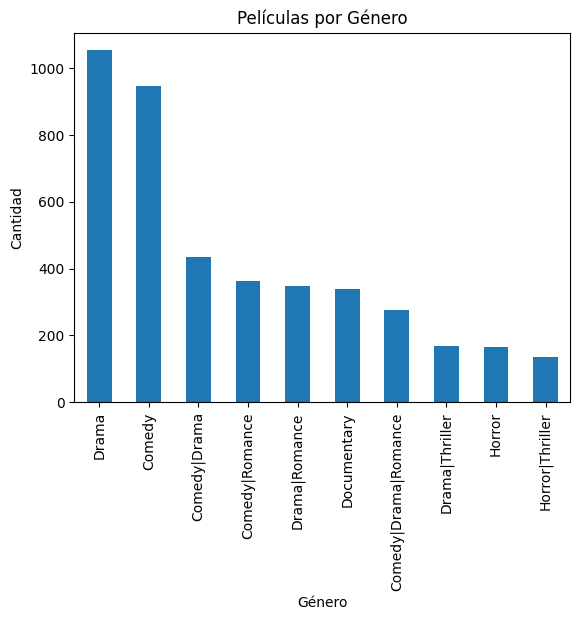

In [ ]:
import matplotlib.pyplot as plt

genre_counts.head(10).plot(kind='bar', title='Películas por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


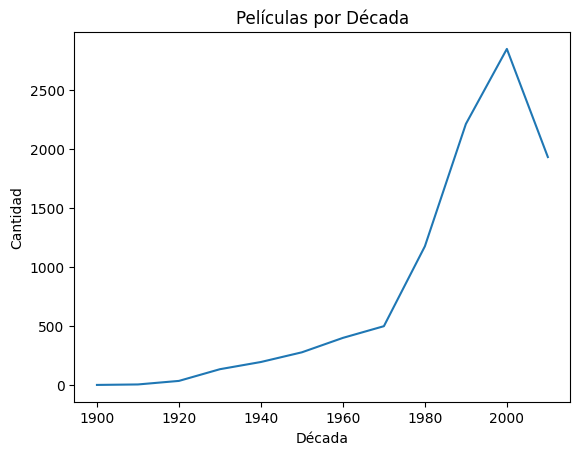

In [ ]:
movies_by_decade.plot(kind='line', title='Películas por Década')
plt.xlabel('Década')
plt.ylabel('Cantidad')
plt.show()


In [5]:
df_action_movies.to_csv('action_movies.csv', index=False)


NameError: name 'df_action_movies' is not defined

In [4]:

 
dfdb.to_excel('movies.xlsx', index=False)


NameError: name 'dfdb' is not defined

In [3]:
import pandas as pd
import sqlite3

query = "SELECT * FROM movies WHERE genres LIKE '%Comedy%'"
df_comedy = pd.read_sql_query(query, conn)
print(df_comedy.head())


NameError: name 'conn' is not defined

In [2]:
import sqlite3
import pandas as pd

# Ruta de la base de datos
db_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/Users/aurelio.sosa.netmind/Pandas/database.db"

# Establecer la conexión a la base de datos
try:
    conn = sqlite3.connect(db_path)

    # Ejecutar la consulta SQL para obtener las películas de comedia
    query = "SELECT * FROM movies WHERE genres LIKE '%Comedy%'"
    df_comedy = pd.read_sql_query(query, conn)

    # Mostrar las primeras filas del DataFrame
    print(df_comedy.head())

except Exception as e:
    print("Error al conectar a la base de datos:", e)

finally:
    conn.close()  # Cerrar la conexión a la base de datos


Error al conectar a la base de datos: unable to open database file


NameError: name 'conn' is not defined

In [1]:
import os

# Ruta relativa del archivo
archivo = "database.db"

# Obtener la ruta absoluta
ruta_absoluta = os.path.abspath(archivo)

print("Ruta absoluta del archivo:", ruta_absoluta)


Ruta absoluta del archivo: /mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/database.db
